In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_fum_salary_19-20')

In [3]:
rbs.dtypes

NAME         object
FUM           int64
FUM_rank    float64
salary        int64
dtype: object

In [4]:
rbs.head()

,NAME,FUM,FUM_rank,salary
0,Joe Mixon,0,18.0,1362544
1,Chase Edmonds,0,18.0,728090
2,Marlon Mack,0,18.0,704912
3,Tevin Coleman,0,18.0,4250000
4,Latavius Murray,0,18.0,3600000


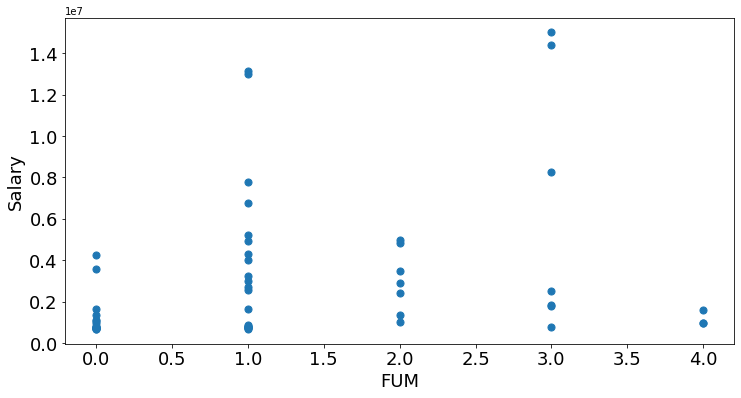

In [5]:
ax = rbs.plot(kind="scatter", x = 'FUM',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUM', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['FUM', 'salary']])

In [7]:
X.mean(axis = 0)

array([-1.64477485e-17, -1.02798428e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.06114696, -0.4511013 ],
       [ 0.6311944 ,  3.00908332],
       [ 0.24387056,  0.59238412],
       [ 1.84849789, -0.45446018],
       [-1.07303049, -0.50960728]])

In [11]:
km.predict(X)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       3, 3, 2, 3, 3, 1, 1, 3, 3, 3], dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,FUM,FUM_rank,salary,clusters
0,Joe Mixon,0,18.0,1362544,4
1,Chase Edmonds,0,18.0,728090,4
2,Marlon Mack,0,18.0,704912,4
3,Tevin Coleman,0,18.0,4250000,4
4,Latavius Murray,0,18.0,3600000,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[ 1.18750000e+00,  1.49986181e+06],
       [ 2.00000000e+00,  1.38750000e+07],
       [ 1.54545455e+00,  5.23182345e+06],
       [ 3.42857143e+00,  1.48784900e+06],
       [-2.22044605e-16,  1.29061875e+06]])

In [14]:
rbs.groupby('clusters')[['FUM', 'salary']].mean()

,FUM,salary
clusters,,
0,1.187500,1.499862e+06
1,2.000000,1.387500e+07
2,1.545455,5.231823e+06
3,3.428571,1.487849e+06
4,0.000000,1.290619e+06


In [15]:
centroids = rbs.groupby('clusters')[['FUM', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

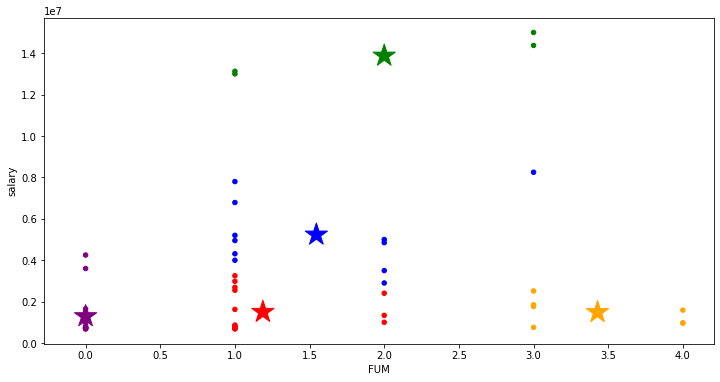

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'FUM', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUM', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

14.416180089329117

In [18]:
silhouette_score(X, km.labels_)

0.541670020401431